In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter, defaultdict
from functools import partial
from vectors import dot
import random

In [28]:
def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    calculation = dot(weights,x) + bias
    return step_function(calculation)


def sigmoid(t):
    return 1/(1 + math.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(dot(weights, inputs))


def feed_forward(neural_network, input_vector):

    outputs = []

    for layer in neural_network:
        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias) for neuron in layer]
        outputs.append(output)

        input_vector = output 

    return outputs


In [29]:
xor_network = [[[20,20,-30],[20,20,-10]],[[-60,60,-30]]]

for x in [0,1]:
    for y in [0,1]:
        print(x,y,feed_forward(xor_network,[x,y])[-1])

0 0 [9.38314668300676e-14]
0 1 [0.9999999999999059]
1 0 [0.9999999999999059]
1 1 [9.383146683006828e-14]


In [30]:
def backpropagation(network, input_vectors, targets):
    hidden_outputs, outputs = feed_forward(network, input_vectors)

    output_deltas = [output*(1 - output)*(output - target) for output,target in zip(outputs,targets)]

    for i, output_neuron in enumerate(network[-1]):
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            output_neuron[j] -= output_deltas[i]*hidden_output

    hidden_deltas = [hidden_output*(1-hidden_output)*dot(output_deltas,[n[i] for n in network[-1]])
                     for i, hidden_output in enumerate(hidden_outputs)]
    
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vectors + [1]):
             hidden_neuron[j] -= hidden_deltas[i]*input

In [31]:
targets = [[1 if i == j else 0 for i in range(10)] for j in range(10)]

random.seed(10)
input_size = 25
num_hidden = 5
output_size = 10
hidden_layer = [[random.random() for _ in range(input_size + 1)] for _ in range(num_hidden)]
output_layer = [[random.random() for _ in range(num_hidden + 1)] for _ in range(output_size)]
network = [hidden_layer, output_layer]

In [32]:
inputs = [
    [1, 1, 1, 1, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,],

    [0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0,0,],

    [1, 1, 1, 1, 1,
    0, 0, 0, 0, 1,
    1, 1, 1, 1, 1,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,],

    [ 1, 1, 1, 1, 1,
    0, 0, 0, 0, 1,
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 1,
    1, 1, 1, 1, 1,],

    [1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 1,
    0, 0, 0, 0, 1,], 

    [ 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 1,
    1, 1, 1, 1, 1,],

    [ 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,],

    [1, 1, 1, 1, 1,
    0, 0, 0, 0, 1,
    0, 0, 0, 1, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,],

    [1, 1, 1, 1, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,],

    [1, 1, 1, 1, 1,
    1, 0, 0, 0, 1,
    1, 1, 1, 1, 1,
    0, 0, 0, 0, 1,
    1, 1, 1, 1, 1,]
]


for _ in range(10000):
    for input_vector, target_vector in zip(inputs,targets):
        backpropagation(network, input_vector, target_vector)

In [33]:
def predict(input):
    return feed_forward(network,input)[-1]

predict(inputs[7])

[0.009755267105217375,
 0.016849544392888233,
 3.940551536650131e-05,
 0.004695273196870386,
 4.698130587673203e-07,
 1.0770013928033583e-07,
 8.307370385852996e-07,
 0.9732662196554288,
 3.1090925599406223e-13,
 1.2360250239344405e-13]

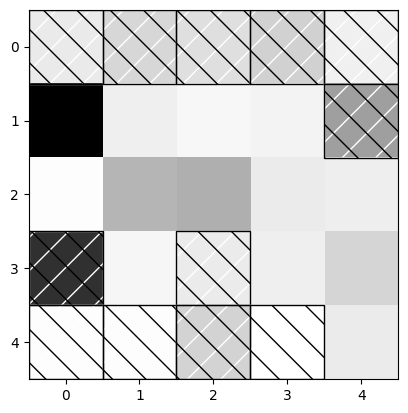

In [34]:
import matplotlib

def patch(x, y, hatch, color):
    return matplotlib.patches.Rectangle((x - 0.5, y - 0.5), 1, 1,hatch=hatch, fill=False, color=color)


weights = network[0][0]
# primeiro neurônio na camada oculta
abs_weights = list(map(abs, weights)) # a escuridão depende somente do valor absoluto

grid = [abs_weights[row:(row+5)] for row in range(0,25,5)] 

ax = plt.gca()
# para usar hachuras, precisamos de eixos
ax.imshow(grid,cmap=matplotlib.cm.binary, interpolation='none')
# assinala blocos como blocos

for i in range(5):
# linha
    for j in range(5):
    # coluna
        if weights[5*i + j] < 0:
        # linha i, coluna j = pesos[5*i + j]
        # adiciona hachuras preto e brancas, visíveis sejam claras ou escuras
            ax.add_patch(patch(j, i, '/', "white"))
            ax.add_patch(patch(j, i, '\\', "black"))
plt.show()